A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [12]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
from sympy import init_printing
from scipy import interpolate
import matplotlib.pylab as plt
from sympy import Symbol
from scipy import misc
from scipy import optimize
from scipy import integrate
import datetime 
from datetime import timedelta

In [13]:
df=pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json") 
df

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


In [14]:
fit=np.polyfit(df.hours,df.followers,deg=2)              #ajuste (fit) 
p=np.poly1d(fit,variable="x")                            #polinomio
h=np.linspace(0,5000)                                    #arreglo con mas hora para poder ver la grafica completa 
v=fit[1]
a=2*fit[0]
print(p)
print("La velocidad inicial de incremento de seguidores es: %5lf [followers/hour]" %v)
print("La aceleración constante es: %5lf [followers/hour**2]" %a)

           2
-0.002438 x + 8.552 x + 4.276e+04
La velocidad inicial de incremento de seguidores es: 8.552138 [followers/hour]
La aceleración constante es: -0.004875 [followers/hour**2]


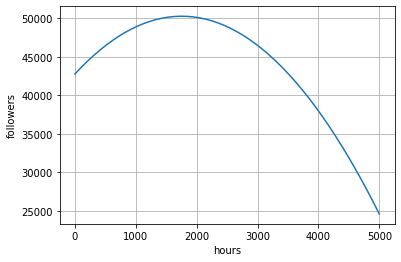

In [16]:
plt.plot(h,p(h))                                        #grafica followers 
plt.xlabel("hours")
plt.ylabel("followers")
plt.grid()

In [17]:
x=Symbol("x")
wxn=sp.lambdify(x,-p(x),'numpy')                       
min=optimize.fminbound(wxn,1000,1500)         #minimo de la funcion negativa para hallar el maximo
max=p(abs(min))                               #maximo de la funcion


fechai=df["date_time"][0]
fechamax=fechai+datetime.timedelta(hours=min)           #fecha de la hora en la que alcanzó el maximo

print("El número máximo de seguidores que alcanzaría el perfil:%5lf" %max)
print("La fecha en la que se alcanzaría dicho máximo:%s" %fechamax)

El número máximo de seguidores que alcanzaría el perfil:50104.631469
La fecha en la que se alcanzaría dicho máximo:2021-10-06 10:06:53.531703


#Se puede reescribir como:
-
$$
\frac{T}{T_{0}}=\frac{2}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$

In [18]:
def intgr(α,a,b):                                                               #α=ángulos enteros (en grados)  0≤α≤90, a y b son los limites de integracion
  t=[]                                                                          # lista donde se van almacenar las funcioness dependiendo de los α
  for i in α:       
    f_= lambda x:(2/np.pi)*(1/((1-(np.sin(i/2)**2)*(np.sin(x)**2))**0.5))
    t.append(f_)
  t2=[]                                                                         #lista donde se van a almacenar los valores de las integrales 
  for i in range(0,len(t)):
    integral=integrate.quad(t[i],a,b)
    t2.append(integral[0])
  return t2                                                                     #la funcion devolvera los valores de las integrales 

In [19]:
a=0                                            #limite inicial
b=np.pi/2                                      #limite final 
α=np.linspace(0,90,90).astype(int)             #ángulos enteros (en grados)  0≤α≤90
Arad=np.radians(α)                             # ángulos enteros (en radianes)  0≤α≤90
l=intgr(α,a,b)                                 # Valores de la integral
df = pd.DataFrame({'Amplitud[deg]':α ,
                   'Amplitud[rad]':Arad ,
                   'T/T0': l})

df

,Amplitud[deg],Amplitud[rad],T/T0
0,0,0.000000,1.000000
1,1,0.017453,1.066334
2,2,0.034907,1.328904
3,3,0.052360,2.571234
4,4,0.069813,1.478815
...,...,...,...
85,85,1.483530,2.430536
86,86,1.500983,1.313679
87,87,1.518436,1.061456
88,88,1.535890,1.000078


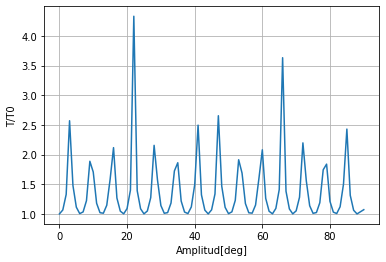

In [20]:
plt.plot(df["Amplitud[deg]"],df["T/T0"])     #grafica de T/T0  como función de  α  (en grados)
plt.ylabel("T/T0")
plt.xlabel("Amplitud[deg]")
plt.grid()

cuando $\alpha=0$ , 
tenemos que$T=T_0$ 
luego como la amplitud es igual a cero, los periodos sonn exactamente los mismos